In [192]:
pip install librosa soundfile  pandas

Note: you may need to restart the kernel to use updated packages.


In [193]:
#Import All Important Libraries
import librosa
import soundfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [194]:
#function for extracting mfcc file, Look at mel spectographs and chromagraphs to get more features
def extract_feature(file_name):
    X,sample_rate = librosa.load(file_name)
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))
    return result

#Define the motions dictionary
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

#Emotions we want to observe
observed_emotions = ['sad', 'angry', 'surprised','calm']

#Load the data and extract features for each sound file
def load_data(test_size = 0.2):
    x, y = [], []
    rootdir = "/Users/nishantacharya/Desktop/EBADL/SER_Folder/Audio_Speech_Actors_01-24/"
    dirs =['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']
    for dr in dirs:
        #print(dr)
        for subdr,drs,fls in os.walk(rootdir+dr+"/"):
            for file in fls:
                file_name = os.path.basename(rootdir+dr+"/"+file)
                emotion = emotions[file_name.split('-')[2]]
                if emotion not in observed_emotions:
                    continue
                feature = extract_feature(rootdir+dr+"/"+file)
                #print(file)
                x.append(feature)
                y.append(emotion)
    return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)

In [195]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

In [196]:
#Shape of train and test set and Number of features extracted
print((x_train.shape[0], x_test.shape[0]))
#print(y_train)
print(f'Features extracted: {x_train.shape[1]}')

(614, 154)
Features extracted: 40


In [197]:
#Initialise Multi Layer Perceptron Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 1000)

In [198]:
model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=1000)

In [199]:
np.unique(np.array(y_train),return_counts = True)

(array(['angry', 'calm', 'sad', 'surprised'], dtype='<U9'),
 array([163, 149, 151, 151]))

In [200]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from numpy import array
from numpy import hstack
import pandas as pd
import math

In [201]:
#Preparing the Data, #Try concatenating all 19 days as training data unit
def prepData(days,split):
    
    path_sr = "/Users/nishantacharya/Desktop/EBADL/Aras/House_A/DAY_"+str(1)+".txt"
    path_rs = "/Users/nishantacharya/Desktop/EBADL/Aras/HD"+str(1)+".csv"
    d_txt = pd.read_csv(path_sr, sep = ' ')
    d_txt.to_csv(path_rs)
        
    d_df = pd.read_csv(path_rs,index_col = 0)
        
    d_df.columns = range(1,23)
    d_df.to_csv(path_rs)
    
    d_df.drop(22,axis=1, inplace=True)
    
    Data_t = d_df.values
    
    #Getting the testing data
    for day in range(2,days+1):
        path_s = "/Users/nishantacharya/Desktop/EBADL/Aras/House_A/DAY_"+str(day)+".txt"
        path_r = "/Users/nishantacharya/Desktop/EBADL/Aras/HD"+str(day)+".csv"
        d_txt = pd.read_csv(path_s, sep = ' ')
        d_txt.to_csv(path_r)
        
        d_df = pd.read_csv(path_r,index_col = 0)
        
        d_df.columns = range(1,23)
        d_df.to_csv(path_r)
        
        d_df.drop(22,axis=1, inplace=True)
        
        Data_t = np.concatenate((Data_t,d_df.values),axis = 0)
        
    
        
    #Getting the training data
    path_sr = "/Users/nishantacharya/Desktop/EBADL/Aras/House_A/DAY_"+str(days+1)+".txt"
    path_rs = "/Users/nishantacharya/Desktop/EBADL/Aras/HD"+str(days+1)+".csv"
    d_txt = pd.read_csv(path_sr, sep = ' ')
    d_txt.to_csv(path_rs)
        
    d_df = pd.read_csv(path_rs,index_col = 0)
        
    d_df.columns = range(1,23)
    d_df.to_csv(path_rs)
    
    d_df.drop(22,axis=1, inplace=True)
    
    Data_r = d_df.values 
    
    
    #Calculating the number of days to test on, current max for training is 19 days and 4 max for testing data, 
    #the emotional data lines ups with a amx of 4 day test data
    total_days = days*split/100
    test_days = math.floor(total_days*(1-split/100))
    
    for day in range(days+1,test_days):
        path_s = "/Users/nishantacharya/Desktop/EBADL/Aras/House_A/DAY_"+str(day)+".txt"
        path_r = "/Users/nishantacharya/Desktop/EBADL/Aras/HD"+str(day)+".csv"
        d_txt = pd.read_csv(path_s, sep = ' ')
        d_txt.to_csv(path_r)
        
        d_df = pd.read_csv(path_r,index_col = 0)
        
        d_df.columns = range(1,23)
        d_df.to_csv(path_r)
        
        d_df.drop(22,axis=1, inplace=True)
        
        Data_r = np.concatenate((Data_r,d_df.values),axis = 0)
        
    #Split now allows for the test split in terms of days
        
    df_t = pd.DataFrame(Data_t,columns = range(1,22))
    
    df_r = pd.DataFrame(Data_r,columns = range(1,22))
    
    train_Y = df_t[21]
    test_Y = df_r[21]

    df_t.drop(21,axis=1,inplace = True)
    df_r.drop(21,axis=1,inplace = True)
    
    train_X = df_t
    test_X = df_r
    
    #Reshaping the input layers
    train_X_val = train_X.values.reshape(train_X.shape[0],1,train_X.shape[1])
    test_X_val = test_X.values.reshape(test_X.shape[0],1,test_X.shape[1])
    
    train_Y_val = train_Y.values
    test_Y_val = test_Y.values
    
    return train_X_val,train_Y_val,test_X_val,test_Y_val

In [202]:
#Loading datasets
days = 14 # Keeping the learning time low, since the model is encoutnering data out fo distribution, is it okay to do that?
split = 80
train_X,train_Y,test_X,test_Y = prepData(days,split)
#There are 3600 secs in an hour and the data is in seconds, that is each input row is a second apart

In [203]:
train_X[0].shape

(1, 20)

In [204]:
train_X[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [205]:
test_add = [[2.04306985e-04, 3.52844239e-03, 9.96267251e-01] for i in range(0,20)]

In [206]:
a = np.array(test_add)

In [207]:
a.T

array([[2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04,
        2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04,
        2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04,
        2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04,
        2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04],
       [3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.52844239e-03,
        3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.52844239e-03,
        3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.52844239e-03,
        3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.52844239e-03,
        3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.52844239e-03],
       [9.96267251e-01, 9.96267251e-01, 9.96267251e-01, 9.96267251e-01,
        9.96267251e-01, 9.96267251e-01, 9.96267251e-01, 9.96267251e-01,
        9.96267251e-01, 9.96267251e-01, 9.96267251e-01, 9.96267251e-01,
        9.96267251e-01, 9.96267251e-01, 9.96267251e-01, 9.9626

In [208]:
t = np.append(train_X[0],a.T,axis=0)

In [209]:
t

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04,
        2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04,
        2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04,
        2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04,
        2.04306985e-04, 2.04306985e-04, 2.04306985e-04, 2.04306985e-04],
       [3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.52844239e-03,
        3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.52844239e-03,
        3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.52844239e-03,
        3.52844239e-03, 3.52844239e-03, 3.52844239e-03, 3.5284

In [210]:
t.shape

(4, 20)

In [211]:
Y = model.predict_proba(x_train)#70% accuracy here

In [212]:
Y

array([[9.69913934e-02, 1.82877856e-04, 3.31479873e-04, 9.02494249e-01],
       [1.61052379e-02, 2.92951847e-02, 9.40588499e-02, 8.60540728e-01],
       [3.81511069e-02, 8.06598467e-01, 3.41263947e-02, 1.21124032e-01],
       ...,
       [1.04500650e-01, 8.27128973e-01, 3.44086496e-02, 3.39617271e-02],
       [1.36744957e-02, 1.79307093e-03, 2.39207957e-03, 9.82140354e-01],
       [1.01216718e-02, 2.13707684e-01, 4.76830880e-03, 7.71402335e-01]])

In [213]:
y_pred = model.predict(x_train)

In [214]:
y_train

['surprised',
 'sad',
 'calm',
 'angry',
 'surprised',
 'angry',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'sad',
 'calm',
 'calm',
 'surprised',
 'angry',
 'sad',
 'angry',
 'calm',
 'sad',
 'sad',
 'angry',
 'calm',
 'calm',
 'angry',
 'angry',
 'sad',
 'surprised',
 'surprised',
 'sad',
 'sad',
 'calm',
 'angry',
 'angry',
 'angry',
 'sad',
 'surprised',
 'calm',
 'angry',
 'sad',
 'angry',
 'angry',
 'calm',
 'calm',
 'calm',
 'sad',
 'calm',
 'angry',
 'surprised',
 'angry',
 'calm',
 'angry',
 'angry',
 'angry',
 'calm',
 'surprised',
 'calm',
 'angry',
 'angry',
 'surprised',
 'calm',
 'calm',
 'angry',
 'angry',
 'sad',
 'angry',
 'surprised',
 'angry',
 'angry',
 'angry',
 'calm',
 'sad',
 'calm',
 'sad',
 'sad',
 'sad',
 'sad',
 'surprised',
 'calm',
 'sad',
 'angry',
 'surprised',
 'sad',
 'sad',
 'calm',
 'sad',
 'sad',
 'sad',
 'surprised',
 'surprised',
 'sad',
 'calm',
 'sad',
 'surprised',
 'calm',
 'sad',
 'sad',
 'surprised',
 'angry',
 'angry',
 'angry

In [215]:
y_pred

array(['surprised', 'surprised', 'calm', 'angry', 'surprised',
       'surprised', 'surprised', 'surprised', 'surprised', 'surprised',
       'surprised', 'calm', 'surprised', 'surprised', 'angry', 'sad',
       'angry', 'calm', 'calm', 'surprised', 'angry', 'calm', 'calm',
       'angry', 'angry', 'sad', 'surprised', 'surprised', 'sad', 'sad',
       'calm', 'angry', 'angry', 'angry', 'calm', 'surprised', 'calm',
       'angry', 'calm', 'angry', 'angry', 'calm', 'calm', 'calm',
       'surprised', 'calm', 'angry', 'surprised', 'angry', 'calm',
       'angry', 'angry', 'angry', 'calm', 'surprised', 'calm', 'angry',
       'angry', 'surprised', 'calm', 'calm', 'angry', 'angry', 'calm',
       'surprised', 'surprised', 'surprised', 'angry', 'angry', 'calm',
       'sad', 'calm', 'surprised', 'sad', 'sad', 'surprised', 'surprised',
       'calm', 'surprised', 'angry', 'surprised', 'sad', 'sad', 'calm',
       'angry', 'calm', 'sad', 'calm', 'surprised', 'sad', 'calm',
       'surprised', 

In [216]:
accuracy = accuracy_score(y_train, y_pred)

In [217]:
accuracy

0.7964169381107492

In [218]:
Y.shape

(614, 4)

In [219]:
train_X[0].shape

(1, 20)

In [220]:
a = [Y[0] for i in range(0,20)]
print(np.array(a).T.shape)
t = np.append(train_X[0],np.array(a).T,axis=0)

(4, 20)


In [221]:
def data_prep(n_data,e_data):
    counter = 2630
    j = 0
    data = np.zeros((n_data.shape[0],n_data.shape[1]+np.array(e_data).shape[1],n_data.shape[2]))
    for i in range(0,n_data.shape[0]):
        if i > counter:
            counter += counter
            j+= 1
            if j >= 460:
                break
        a = [e_data[j] for i in range(0,20)]
        data[i] = np.append(n_data[i],np.array(a).T,axis=0)
    return data
    

In [222]:
train_data = data_prep(train_X,Y)

In [223]:
train_data.shape

(1209586, 5, 20)

In [231]:
test_X.shape

(86399, 1, 20)

In [224]:
x_test.shape

(154, 40)

In [225]:
Y = model.predict_proba(x_test)
y_pred = model.predict(x_test)

In [226]:
accuracy = accuracy_score(y_test, y_pred)

In [227]:
accuracy

0.6428571428571429

In [228]:
#Prepare validation dataset
def data_prep(n_data,e_data):
    counter = 561
    j = 0
    data = np.zeros((n_data.shape[0],n_data.shape[1]+np.array(e_data).shape[1],n_data.shape[2]))
    for i in range(0,n_data.shape[0]):
        if i > counter:
            counter += counter
            j+= 1
            if j >= 460:
                break
        a = [e_data[j] for i in range(0,20)]
        data[i] = np.append(n_data[i],np.array(a).T,axis=0)
    return data

In [232]:
test_data = data_prep(test_X,Y)

In [233]:
test_data.shape

(86399, 5, 20)

In [257]:
#Creating the model
model_m = Sequential()
model_m.add(LSTM(50, input_shape=(train_data.shape[1], train_data.shape[2]))) #input Layer
model_m.add(Dense(1))
model_m.compile(loss='mae', optimizer='adam')#output layer

In [258]:
history_m = model_m.fit(train_data, train_Y, epochs= 360, verbose=2,validation_data=(test_data, test_Y), shuffle=False)#Assuming the data is fully accurate

Train on 1209586 samples, validate on 86399 samples
Epoch 1/120
 - 56s - loss: 3.4278 - val_loss: 5.7575
Epoch 2/120
 - 43s - loss: 2.9891 - val_loss: 5.3173
Epoch 3/120
 - 43s - loss: 2.9287 - val_loss: 5.1800
Epoch 4/120
 - 43s - loss: 2.8296 - val_loss: 5.0354
Epoch 5/120
 - 43s - loss: 2.8570 - val_loss: 4.3141
Epoch 6/120
 - 41s - loss: 2.8560 - val_loss: 4.6204
Epoch 7/120
 - 43s - loss: 2.7780 - val_loss: 4.1731
Epoch 8/120
 - 43s - loss: 2.7442 - val_loss: 3.9520
Epoch 9/120
 - 42s - loss: 2.6750 - val_loss: 3.8332
Epoch 10/120
 - 42s - loss: 2.7221 - val_loss: 3.7316
Epoch 11/120
 - 43s - loss: 2.7172 - val_loss: 3.8673
Epoch 12/120
 - 43s - loss: 2.7002 - val_loss: 4.0298
Epoch 13/120
 - 42s - loss: 2.6954 - val_loss: 4.2879
Epoch 14/120
 - 43s - loss: 2.6629 - val_loss: 4.1577
Epoch 15/120
 - 44s - loss: 2.6881 - val_loss: 3.9761
Epoch 16/120
 - 45s - loss: 2.7072 - val_loss: 3.9362
Epoch 17/120
 - 45s - loss: 2.7008 - val_loss: 4.0919
Epoch 18/120
 - 45s - loss: 2.6694 - va

In [260]:
from matplotlib import pyplot

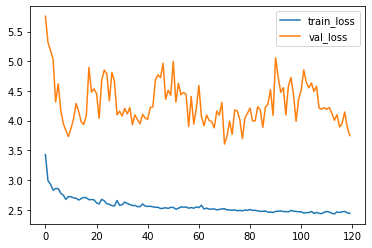

In [261]:
pyplot.plot(history_m.history['loss'], label='train_loss')
pyplot.plot(history_m.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

In [ ]:
#Try using the actual values instead,#Needs a probablistic distribution of the voice